

# Project: Investigate a Dataset (No-show appointments Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset is about 100k medical appointments and its 15 variables (characteristics) of each. this dataset collects information from Brazil. Some Columns are described below.
    <ul>
        <li>'ScheduledDay' tells us on what day the patient set up their appointment.</li>
        <li>‘Neighborhood’ indicates the location of the hospital.</li>
        <li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://www.centreforpublicimpact.org/case-study/bolsa-familia-in-brazil/)</li>
    </ul>
    
>I intend to explore the intension of creating this dataset i.e. factors which predict if a patient will show up for their scheduled appointment or not. Through follwing questions I will give my conclusion.<br>
1. Which age group has maximum show up rate for appointments and which has lowest?<br>
2. Do females or males are more likely to show up for appointment than the other one?<br>
3. Whether patients having financial aids given by government are more dedicated towards showing up for the appointments they have booked?<br>
4. Does sending SMS help patients to show up for appointments or not?<br>
5. On which day of week, appointments have maximum showup rate and on which day it is minimum.<br>
6. Does greater waiting days beetween scheduled day and appointment day result in less Show up rate for appointments?
7. How is the ailments effecting the probability of whether patients will show up for appointments or not?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
<br>

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading data from csv to dataframe named df
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
#Get number of columns and rows in the database
df.shape

(110527, 14)

There are **110526 rows** of data entries and **14 columns**

In [4]:
#printing first few rows of data with column headers
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


>Here No-show column creates an ambiguity as the value 'No' can mean that patient did not show for appointment or it's a negation of statement "patient did not show up".

**Note :** I am considering that the value 'No' in No-show column means that it is negation of statement "patient did not show up for appointment"

>Also by looking at the values of AppointmentDay and ScheduledDay we see that there is an error that is time and day at which appointment is booked (scheduled) is ahead of the time and day on which appointment is actually, so it says people booked an appointment for previous days. So we need to remove those entries as these are not appropriate for our use.\

>AppointmentDay has time portion set to zero so we will consider only date and not the time for calculating waiting days.

In [5]:
# To check number of duplicate entries in the data
sum(df.duplicated())

0

>No duplicate entries found in the data.

In [6]:
# Checking the data types of data of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
#Datatypes of columns that appears to be object. 
type(df['Gender'][0]), type(df['No-show'][0]), type(df['ScheduledDay'][0]), type(df['AppointmentDay'][0])

(str, str, str, str)

>data types of some columns must be corrected such as ScheduledDay, its datatype should be datetime

In [8]:
# Checking number of unique values each column consits
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

>Handcap should have oly two values that are true(1) or false(0), but here it shows it has 5 unique values. According to the [discussions on original dataset on Kaggle](https://www.kaggle.com/joniarroba/noshowappointments/discussion/32174)  I found that these corresponds to sum of all handicap conditions, i.e. 2 means patient has fisical and visual handicap condition.

>As we can see unique appointment ids are equal to total entries of dataset hence no duplicate appointment ids are there. But patient ids are repeating so a single patient may have booked multiple appointments. So we have new patients and recurring patients.

>Age has 104 unique entries hence it has people of more than 100 age or something else this needs a closer investigation.

In [9]:
#Having closer look at age column
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

>minimum age is -1 and maximum age is 115 in the dataset.

In [10]:
df.Age.value_counts().nsmallest(10)

 99      1
-1       1
 102     2
 100     4
 115     5
 98      6
 97     11
 96     17
 95     24
 94     33
Name: Age, dtype: int64

>As we see that there is only one entry with -1 age it is definitely an error in the dataset so we have to remove that error and we will keep ages above 100 as they quite a few entries in the dataset

In [11]:
# Checking for Null values in the columns
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no empty cell in any column



### Data Cleaning (Removing the unuseful information from the dataset)

> **Important observation regarding this process**
> 1. We need to remove unuseful column such as PatientId, AppointmetId.
> 2. Renaming columns as they have spelling errors
> 3. We will change No-show column to status to avoid confusion.
> 4. Changing ScheduledDay and AppointmetDay column into date format.
> 5. Removing rows which have negative waiting days between appointmentday and scheduledday.
> 6. Removing row with negative age.

#### Removing unuseful columns

> **Columns to be removed :** PatientId, AppointmentId

In [12]:
#Creating new dataframe without columns PatientId and AppointmentId
df_a = df.loc[:,'Gender':'No-show']
df_a.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Renaming Columns

> **Columns to be renamed :** Handcap to SMS_received and SMS_received to Handicap 

In [13]:
df_a.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'}, inplace=True)
df_a.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


#### Modifying No-show Column

> We will rename the No-show column to Status and map its values to true(1, if person showed up for appointment) and false(0, if person didn't show up)

In [14]:
#renaming column with change to happen in same dataframe
df_a.rename(columns={'No-show':'Status'}, inplace=True)

#Changing values of column to true(1) or false(0) state
df_a.replace({'Status': {'No': 1, 'Yes': 0}}, inplace=True)

df_a.head(5)


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


#### Changing Datatypes

> **Columns whose datatypes to be corrected :** ScheduledDay, AppointmentDay

In [15]:
# datatypes of date and time should be changed to datetime to implement operations
df_a.ScheduledDay = pd.to_datetime(df_a['ScheduledDay'])
df_a.AppointmentDay = pd.to_datetime(df_a['AppointmentDay'])
df_a.dtypes 

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
Status                     int64
dtype: object

#### Triming Data

> **Rows to be droped according to:** rows which have appointmentday before of the scheduledday are to be dropped and rows with negative age also should be removed.

In [16]:
# Creating new dataframe with short and trimmed database.
df_b = df_a[df_a['ScheduledDay'].dt.date <= df_a['AppointmentDay'].dt.date]
df_b.shape

(110522, 12)

> 5 rows are removed from the dataset.

In [17]:
df_b = df_b[df_b['Age'] >= 0]
df_b.shape

(110521, 12)

>1 row is removed from the dataset.

<a id='eda'></a>
## Exploratory Data Analysis


#### Percentage Show up rate and No show up rate considering all appointments

In [18]:
Status = df_b['Status'].value_counts()
print("Show Up rate ", np.round_(((Status[1]/Status.sum())*100), decimals=2), "%")
print("NO Show Up rate ", np.round_(((Status[0]/Status.sum())*100), decimals=2), "%")

Show Up rate  79.81 %
NO Show Up rate  20.19 %


>Overall 79.81% appointments have their pateints show up for their appointments and 20.19% of appointments have defaulter patients.

### Research Question 1 : Which age group has maximum show up rate for appointments and which has lowest?

>First we will create a age group column with values as the age gap with gap of 20 years.

In [19]:
bin_edges = list(range(0,120,20))
bin_labels = ["{0} - {1}".format(i, i + 20) for i in range(0, 100, 20)]
df_b['Age-groups'] = pd.cut(df_b['Age'], bin_edges, labels=bin_labels)
df_b.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status,Age-groups
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,60 - 80
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,40 - 60
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,60 - 80
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0 - 20
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,40 - 60


In [20]:
#calculating percentage of status boolean according to age groups
df_byagegroup = pd.crosstab(df_b['Age-groups'], df_b['Status'], normalize='index')

#Calculating percentage and rounding off the decimals to two places only
df_byagegroup = np.round_((df_byagegroup*100), decimals=2)
df_byagegroup

Status,0,1
Age-groups,,
0 - 20,22.80,77.20
20 - 40,22.97,77.03
40 - 60,18.59,81.41
60 - 80,15.00,85.00
80 - 100,16.35,83.65


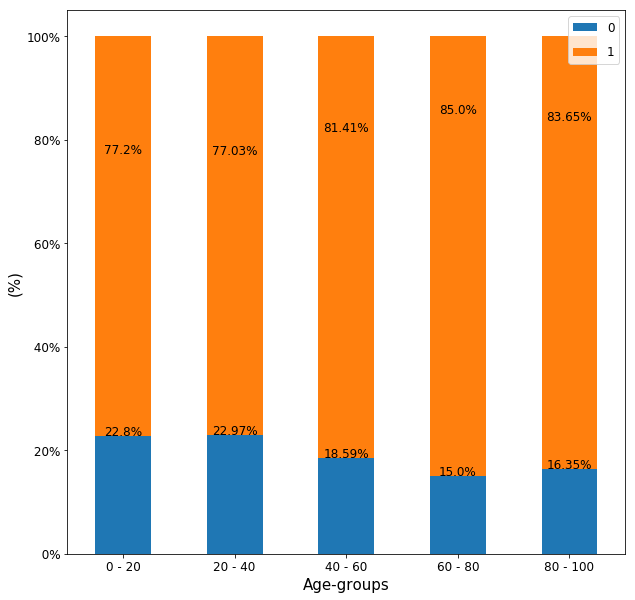

In [21]:
#PLoting percentages on a stacked bar graph
grph = df_byagegroup.plot.bar(figsize=(10,10), stacked= True);

#Formating the Y-axis labels to percentages
labels = grph.get_yticks()
grph.set_yticklabels(['{:3.0f}%'.format(x) for x in labels], fontsize = 12);

#Formating the X-axis labels for ease of viewing
grph.set_xticklabels(df_byagegroup.index,rotation = 360, fontsize = 12);

#Naming Xaxis and Yaxis
grph.set_xlabel(df_byagegroup.index.name, fontsize = 15)
grph.set_ylabel('(%)', fontsize = 15)

#formating the legend of graph
grph.legend(loc = 'upper right',frameon=True, labelspacing=1, fontsize= 12)

#Adding values of bars to be shown on bars itself
rects = grph.patches
for rect in rects:
        height = rect.get_height()
        grph.text(rect.get_x() + rect.get_width()/2, height + 2, str(height)+'%', ha='center', va='top', fontsize = 12)

> **Maximum Showup rate is 85%** corresponding to age group 60-80, old people who have retired. **Minimum Showup rate is 77.03%** corresponding to age group 20-40, who are young adults. The difference in max and min show up rate is 7.97% so age group is a significant attribute in determining whether patient will show up for appointment or not.

### Research Question 2  : Do females or males are more likely to show up for appointment than the other one?

In [22]:
#calculating percentage of sum status boolean values to tatal values according to gender
df_bygender = pd.crosstab(df_b['Gender'], df_b['Status'], normalize='index')
df_bygender = np.round_((df_bygender*100), decimals=2)
df_bygender

Status,0,1
Gender,,
F,20.31,79.69
M,19.96,80.04


>Show up rate of Males is slightly high 80.04% than the females 79.69%. As the difference is very less, gender is not a significant attribute for determing the probability of a patient to show up for appintment. 

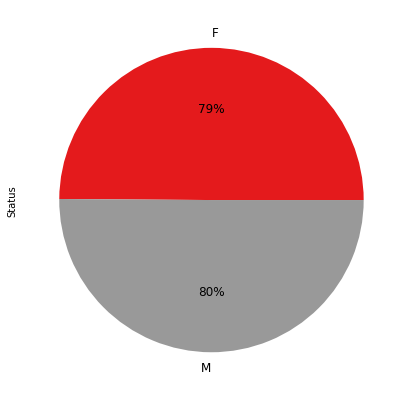

In [23]:
#taking mean of boolean values will gives percentage according to true status.
df_groupgender = df_b.groupby(['Gender'])['Status'].mean()
df_groupgender = np.round_((df_groupgender*100), decimals=2)

#plotting the result of groupby on pie chart
def make_autopct():
    def my_autopct(pct):
        total = df_groupgender.sum()
        val = int((pct*total/100.0))
        return '{v:d}%'.format(p=pct,v=val)
    return my_autopct

ax = df_groupgender.plot.pie(figsize=(7,7), subplots=True, autopct=make_autopct(), fontsize = 12, colormap='Set1');

>The above graph also shows the difference in percentages of appointments of male or female patients is very less and cannot be seen in the above graph

### Research Question 3 : Whether patients having financial aids given by government are more dedicated towards showing up for the appointments they have booked?

>The scholarship column gives a boolean for which appointments are for patients given financial aid and which are not. So considering this column we will calculate percentage show up rate for both boolean values.

In [24]:
df_byschlarship = pd.crosstab(df_b['Scholarship'], df_b['Status'], normalize='index')
df_byschlarship = np.round_((df_byschlarship*100), decimals=2)
df_byschlarship

Status,0,1
Scholarship,,
0,19.80,80.20
1,23.74,76.26


People who do not get financial aids are more dedicated than ones getting it.

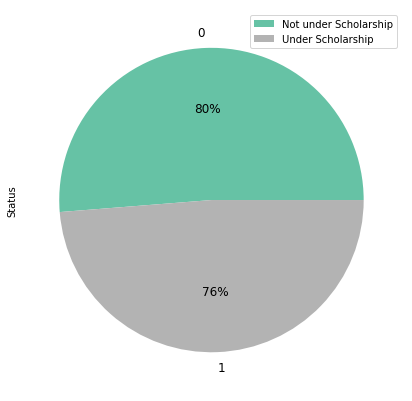

In [25]:
#taking mean of boolean values will gives percentage according to true status.
df_groupschol = df_b.groupby(['Scholarship'])['Status'].mean()
df_groupschol = np.round_((df_groupschol*100), decimals=2)

#plotting the result of groupby on pie chart
def make_autopct():
    def my_autopct(pct):
        total = df_groupschol.sum()
        val = int((pct*total/100.0))
        return '{v:d}%'.format(p=pct,v=val)
    return my_autopct

grph = df_groupschol.plot.pie(figsize=(7,7), autopct=make_autopct(), fontsize = 12, colormap='Set2', legend=True);
grph.legend(loc = 'upper left', labelspacing=1, fontsize= 15)
grph.legend(['Not under Scholarship', 'Under Scholarship'])

Showup rate of people not getting financial aids is 80.2%. Showup rate for people getting financial aids from government is 76.26%. The difference in show up rates is 3.94%, so Scholarship criteria can be taken in account while determining whether patient will show up for appointment or not.

### Research Question 4 : Does sending SMS help patients to show up for appointments or not?

In [26]:
#calculating percentage of sum status boolean values to tatal values according to SMS revieved or not
df_bysms = pd.crosstab(df_b['SMS_received'], df_b['Status'], normalize='index')
df_bysms = np.round_((df_bysms*100), decimals=2)
df_bysms

Status,0,1
SMS_received,,
0,16.70,83.30
1,27.57,72.43


Sending SMS is not helping much as people who got sms reminder have less show up rate than patients who did not got.

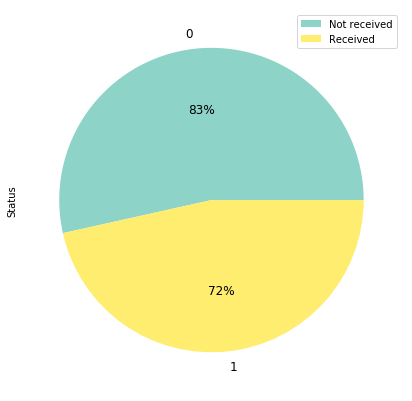

In [27]:
#taking mean of boolean values will gives percentage according to true status.
df_groupsms = df_b.groupby(['SMS_received'])['Status'].mean()
df_groupsms = np.round_((df_groupsms*100), decimals=2)

#plotting the result of groupby on pie chart
def make_autopct():
    def my_autopct(pct):
        total = df_groupsms.sum()
        val = int((pct*total/100.0))
        return '{v:d}%'.format(p=pct,v=val)
    return my_autopct

grph = df_groupsms.plot.pie(figsize=(7,7), autopct=make_autopct(), fontsize = 12, colormap='Set3', legend=True);
grph.legend(loc = 'upper left', labelspacing=1, fontsize= 15)
grph.legend(['Not received', 'Received'])

### Research Question 5 : On which day of week, appointments have maximum showup rate and on which day it is minimum.

    Creating a column with days of week of appointments from the AppointmentDay column

In [28]:
df_b['Dayname'] = pd.to_datetime(df_b['AppointmentDay']).dt.weekday_name
df_b['Dayname'].unique()

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

From this we can infer that as there is not entry with date of sunday the hospital or clinic might be closed on sunday.

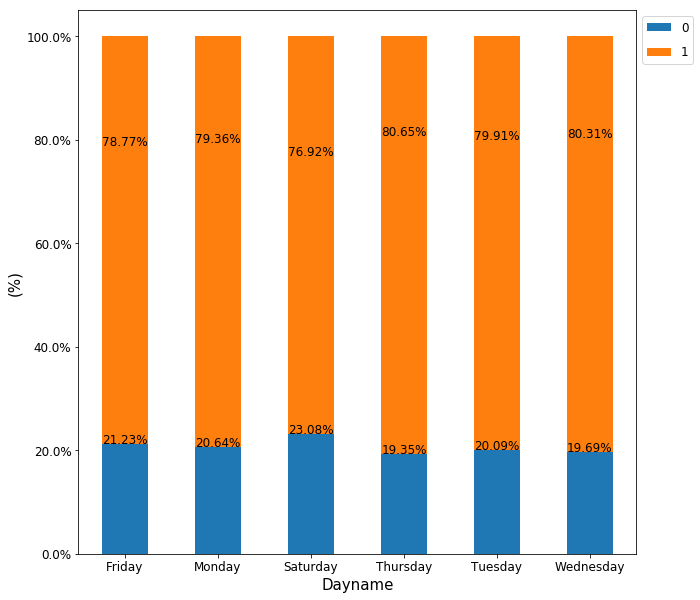

In [29]:
#calculating percentage of sum status boolean values to tatal values according to day of week on which appointment is
df_bydayname = pd.crosstab(df_b['Dayname'], df_b['Status'], normalize='index' )
df_bydayname = np.round_((df_bydayname*100), decimals=2)

#ploting result on stacked bar graph
grph = df_bydayname.plot.bar(figsize=(10,10), stacked=True, sort_columns= True);
labels = grph.get_yticks()
grph.set_yticklabels(['{:3.1f}%'.format(x) for x in labels], fontsize = 12);
grph.set_xticklabels(df_bydayname.index,rotation = 360, fontsize = 12);
grph.set_xlabel(df_bydayname.index.name, fontsize = 15)
grph.set_ylabel('(%)', fontsize = 15)
grph.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), labelspacing=1, fontsize= 12)
rects = grph.patches
for rect in rects:
        height = rect.get_height()
        grph.text(rect.get_x() + rect.get_width()/2, height + 2, str(height)+'%', ha='center', va='top', fontsize = 12)

> **Maximum Showup rate is 80.65%** corresponding to Thursday, a weekday. **Minimum Showup rate is 76.92%** corresponding to Saturday, weekend. The difference in max and min show up rate is 3.73%. Appointments on weekend show more defaulters with 23.08% No show up rate than weekdays.

### Research Question 6 : Does greater waiting days beetween scheduled day and appointment day result in less Show up rate for appointments?

First we will create a column with waiting days and then group them according to same day, week, month.

In [30]:
#creating waiting days column using only dates not time and coverting it from days to an integer variable for ease of grouping.
df_b['Waiting-days'] = (df_b['AppointmentDay'].dt.date - df_b['ScheduledDay'].dt.date).astype('timedelta64[D]').astype(int)
df_b['Waiting-days'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting-days, dtype: float64

In [31]:
#Listing bin edges for grouping waiting days
bin_edges = [-np.inf, 0, 7, 30, 60, 90, 120, 150, 180]

#listing labels for grouping waiting days
bin_labels = ['Same Day', 'Within Week', 'After Week', 'After 1Month', 'After 2Months', 'After 3Months', 'After 4Months', 'After 5Months']

#dividing waiting days into groups
df_b['WaitingDays'] = pd.cut(df_b['Waiting-days'], bin_edges, labels=bin_labels)
df_b.drop('Waiting-days',axis=1, inplace = True)
df_b.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status,Age-groups,Dayname,WaitingDays
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,60 - 80,Friday,Same Day
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,40 - 60,Friday,Same Day
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,60 - 80,Friday,Same Day


Calculating Show up and No show up percentages according to waiting days.

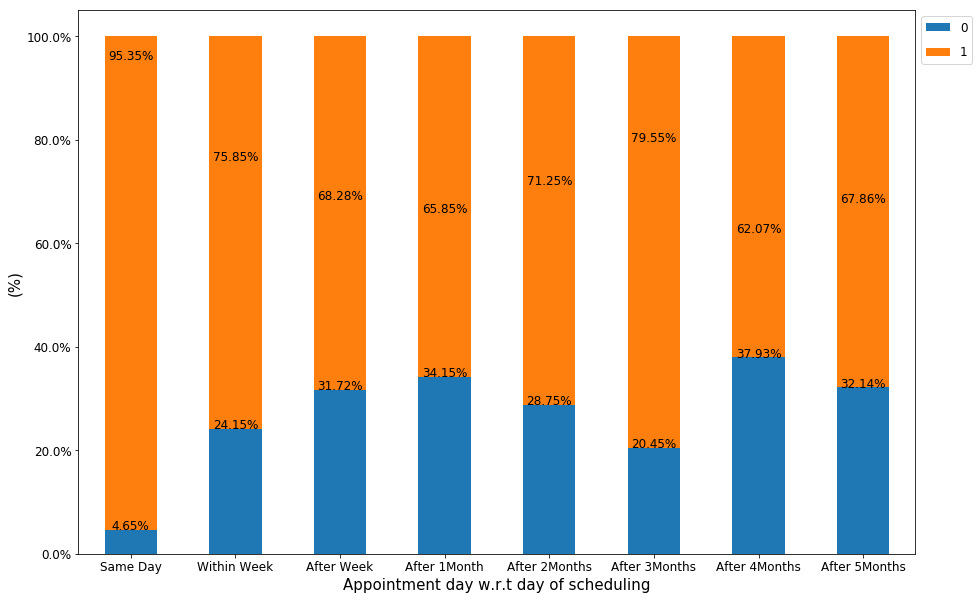

In [32]:
df_bywaitdays = pd.crosstab(df_b['WaitingDays'], df_b['Status'], normalize='index' )
df_bywaitdays = np.round_((df_bywaitdays*100), decimals=2)

#ploting result on stacked bar graph
grph = df_bywaitdays.plot.bar(figsize=(15,10), stacked=True, sort_columns= True);
labels = grph.get_yticks()
grph.set_yticklabels(['{:3.1f}%'.format(x) for x in labels], fontsize = 12);
grph.set_xticklabels(df_bywaitdays.index,rotation = 360, fontsize = 12);
grph.set_xlabel('Appointment day w.r.t day of scheduling', fontsize = 15)
grph.set_ylabel('(%)', fontsize = 15)
grph.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), labelspacing=1, fontsize= 12)
rects = grph.patches
for rect in rects:
        height = rect.get_height()
        grph.text(rect.get_x() + rect.get_width()/2, height + 2, str(height)+'%', ha='center', va='top', fontsize = 12)

>If the appointment is on same day as the day of scheduling of appointment the Show up rate is very high i.e 95.35%.

>There is no particular trend for appointments with waiting days more than a day. maximum No show up rate is 37.93% corresponding to appointments after 4 months from scheduling.

### Research Question 7 : How is the ailments effecting the probability of whether patients will show up for appointments or not?

> We will make a cross tab containing ailments- Hypertension, Diabetes, Alcoholism on one axis and Status on other.

We are not taking handicap as it is not boolean like other ailment columns.

In [33]:
df_byailments = pd.crosstab(df_b.Status, [df_b.Hypertension, df_b.Diabetes, df_b.Alcoholism], normalize='columns' )
df_byailments = np.round_((df_byailments*100), decimals=2)
df_byailments

Hypertension     0                           1                     
Diabetes         0             1             0             1       
Alcoholism       0      1      0      1      0      1      0      1
Status                                                             
0             20.9  21.46  19.99  17.11  17.08  18.49  17.58  17.97
1             79.1  78.54  80.01  82.89  82.92  81.51  82.42  82.03

> Patients suffering from **only alcoholism** have **21.46% No show-up rate** <br>
> Patients suffering from **only diabetes** have **19.99% No show-up rate** <br>
> Patients suffering from **only hypertension** have **17.08% No show-up rate**
<br><br>
> Hence patients suffering from alcoholism have more probability of not showing up for appointments than other ailments.<br><br>
     We can see that if patient is suffering from **hypertension and alcoholism** they have **18.49% No show-up rate** whereas in case of **hypertension and diabetes** patients have **17.58% No show-up rate** which justifies above statement.

We also see that appointmentsfor patients suffering from alcoholism only has highest no-showup rate(21.46%) than patients not having any of these ailments have (20.90%) which is not in case of other ailments.

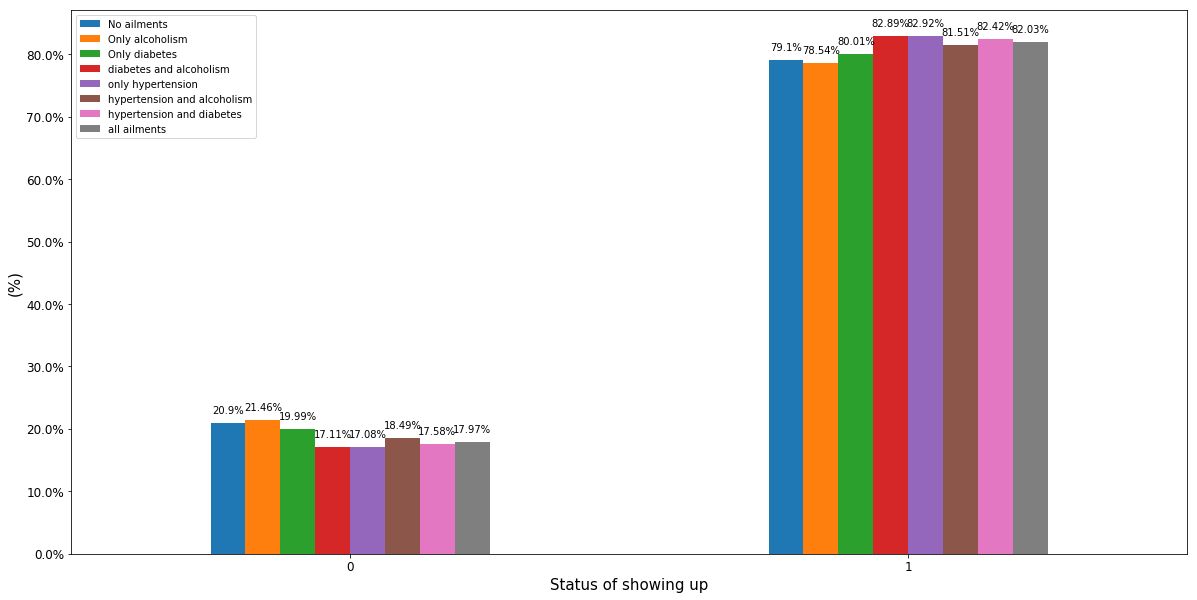

In [34]:
#showing result in graph
grph = df_byailments.plot.bar(figsize=(20,10), sort_columns= True);
labels = grph.get_yticks()
grph.set_yticklabels(['{:3.1f}%'.format(x) for x in labels], fontsize = 12);
grph.set_xticklabels(df_byailments.index,rotation = 360, fontsize = 12);
grph.set_xlabel('Status of showing up', fontsize = 15)
grph.set_ylabel('(%)', fontsize = 15)
grph.legend(loc = 'upper left', labelspacing=1, fontsize= 15)
grph.legend(["No ailments", "Only alcoholism","Only diabetes","diabetes and alcoholism","only hypertension","hypertension and alcoholism","hypertension and diabetes","all ailments"]);
rects = grph.patches
for rect in rects:
        height = rect.get_height()
        grph.text(rect.get_x() + rect.get_width()/2, height + 2, str(height)+'%', ha='center', va='center', fontsize = 10)

<a id='conclusions'></a>
## Conclusions


> The purpose of this project was to investigate No-show appointments dataset in order to explore the relationship between certain parameters. Any relation inferred will be used only as a pointer for conducting further detailed, statistically backed analyses. These findings are tentative and will be updated with use of inferential statisctics and machine learning.

> Here is a summary of the findings after some analysis, which can be used for further analysis to find the absolute factors on which the probability of patients to show up for their appointments depends.
1. From total of 110520 appointments, 20.19% of appointments have their patients do not show up.
2. Old retired patients in the age group 60-80 have maximum show up rate and young adults of age group 20-40 have minimum show up rate
3. Both males and females have almost same probability of showing up for appointments which is 80%.
4. Patients with financial aids under Bolsa Familia have less show up probability than who do not get aids.
5. Sending SMS does not help much as patients who do not recieve a sms have higher probability of showing up for appointments
6. On Saturdays patients have major tendency for not showing up for appointments.
7. Appointments which are scheduled for the same day have high probability for their patients to show up.
8. Appointments in which patient is suffering from alcoholism have less probability of showing up for appointment than with any other problem or ailment.